In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
# Modifying the path so we can import from src directory.
import sys
import os
sys.path.append(os.path.abspath('..'))

from collections import Counter, defaultdict
from itertools import chain
import copy
import pickle
import random
import time

import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from pyvis.network import Network

from src.example_graphs import simple_undirected_graph, simple_directed_graph
from src.UndirectedGraph import UndirectedGraph
from src.DirectedGraph import DirectedGraph
from src.DataLoader import DataLoader
from src.GraphCreator import GraphCreator, NetworkXGraphCreator

from src.io_helpers import pickle_obj, load_pickled_obj
from src.networkx_helpers import combine_graphs

from src.pyvis_helpers import visualize_random_graph

In [3]:
ROOT_DIRECTORY = os.path.split(os.getcwd())[0]
DATA_DIRECTORY = os.path.join(ROOT_DIRECTORY, 'data')
PICKLED_DATA_DIRECTORY = os.path.join(ROOT_DIRECTORY, 'data_pickle')

In [5]:
# DiGraph with weights indicating number of edges.
G_weighted = load_pickled_obj(os.path.join(PICKLED_DATA_DIRECTORY, 'networkx_weighted_full.pickle'))

# MultiDiGraph with individual edges.
G_combined = load_pickled_obj(os.path.join(PICKLED_DATA_DIRECTORY, 'networkx_multigraph_combined.pickle'))

In [16]:
G_weighted_subset = nx.DiGraph(G_weighted.edge_subgraph(G_weighted.edges('veganscience')))
G_weighted_subset.add_weighted_edges_from(G_weighted.edges('organic'))

ValueError: not enough values to unpack (expected 3, got 2)

In [17]:
G_weighted.ed

OutEdgeDataView([('organic', 'news'), ('organic', 'organiclife'), ('organic', 'india')])

In [15]:
g = Network(notebook=True)
g.from_nx(G_weighted_subset)
g.show("notebook_images/veganscience_subset.html")

In [23]:
g1 = nx.DiGraph(G_weighted.edge_subgraph(G_weighted.edges('veganscience')))
g2 = nx.DiGraph(G_weighted.edge_subgraph(G_weighted.edges('organic')))
g3 = nx.DiGraph(G_weighted.edge_subgraph(G_weighted.edges('science')))
g4 = nx.DiGraph(G_weighted.edge_subgraph(G_weighted.edges('vegan')))
g1.add_nodes_from(g2)
g1.add_edges_from(g2.edges)
g1.add_nodes_from(g3)
g1.add_edges_from(g3.edges)
g1.add_nodes_from(g4)
g1.add_edges_from(g4.edges)

In [24]:
g = Network(notebook=True)
g.from_nx(g1)
g.show("notebook_images/veganscience_subset.html")

In [34]:
g1 = nx.DiGraph(G_weighted.edge_subgraph(G_weighted.edges('science')))
for node in list(G_weighted['science']):
    gx = nx.DiGraph(G_weighted.edge_subgraph(G_weighted.edges(node)))
    g1.add_nodes_from(gx)
    g1.add_edges_from(gx.edges)
    
# NOTE: plotting this is kind of a bad idea.
# It takes forever and then ends up just swimmming in data points that can't find a home.
# That's because there are a lot of nodes and edges...
print(g1.number_of_nodes())
print(g1.number_of_edges())

4176
9268


Let's take a look here for drawing: https://networkx.github.io/documentation/stable/auto_examples/drawing/plot_directed.html#sphx-glr-auto-examples-drawing-plot-directed-py

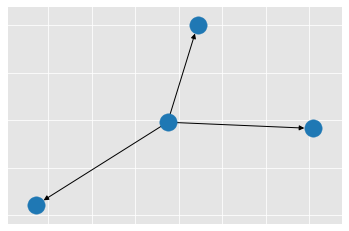

In [28]:
pos = nx.spring_layout(g2)
nodes = nx.draw_networkx_nodes(g2, pos)
edges = nx.draw_networkx_edges(g2, pos)
plt.show()

## py2cytoscape?
https://nbviewer.jupyter.org/github/cytoscape/cytoscape-automation/blob/master/for-scripters/Python/advanced-cancer-networks-and-data.ipynb

## Or Dash / Cytoscape wrapper?
https://pypi.org/project/dash-cytoscape/

## Or Cytoscape / JS-Cytoscape
https://cytoscape.org/

http://js.cytoscape.org/

## Or NetworkX Viewer?

https://github.com/jsexauer/networkx_viewer

## You know what'd be really cool...plotting large graphs in Folium, by mapping graph communities to geographical areas.
https://blog.dominodatalab.com/creating-interactive-crime-maps-with-folium/

## Experimenting with some visualization that definitely doesn't work

/anaconda3/envs/capstone1/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/anaconda3/envs/capstone1/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


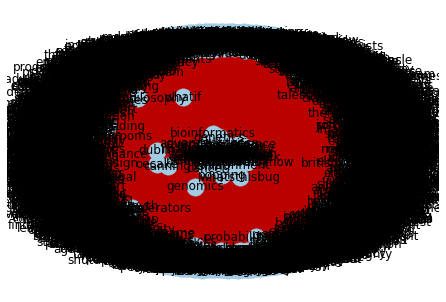

In [35]:
# from https://stackoverflow.com/questions/9402255/drawing-a-huge-graph-with-networkx-and-matplotlib
import matplotlib.pyplot as plt
import networkx as nx

pos=nx.spring_layout(g1)   #G is my graph

nx.draw(g1,pos,node_color='#A0CBE2',edge_color='#BB0000',width=2,edge_cmap=plt.cm.Blues,with_labels=True)
#plt.show()
plt.savefig("notebook_images/test-science.png", dpi=1000, facecolor='w', edgecolor='w',orientation='portrait', papertype=None, format=None,transparent=False, bbox_inches=None, pad_inches=0.1)

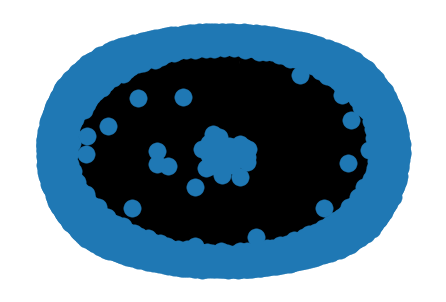

In [36]:
nx.draw(g1,pos)
#plt.show()
plt.savefig("notebook_images/test-science.pdf", dpi=1000, facecolor='w', edgecolor='w',orientation='portrait', papertype=None, format=None,transparent=False, bbox_inches=None, pad_inches=0.1)